In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Завантажити дані, вивести назви колонок і розмір датасета

In [85]:
df = pd.read_csv("bodyfat.csv", encoding='windows-1252')

# Додав ще одну колонку для присвоєння спрощеного індекшу ожиріння
bin_labels = [0, 1, 2, 3]

df['BodyFatEncoded'] = pd.cut(df['BodyFat'], bins=4, labels=bin_labels)

print(f'Dataset size: {df.shape}')
df.head()


Dataset size: (252, 16)


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFatEncoded
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,0
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,2
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,0
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,2


## Опрацювати пропуски

In [86]:
df.info()
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Density         252 non-null    float64 
 1   BodyFat         252 non-null    float64 
 2   Age             252 non-null    int64   
 3   Weight          252 non-null    float64 
 4   Height          252 non-null    float64 
 5   Neck            252 non-null    float64 
 6   Chest           252 non-null    float64 
 7   Abdomen         252 non-null    float64 
 8   Hip             252 non-null    float64 
 9   Thigh           252 non-null    float64 
 10  Knee            252 non-null    float64 
 11  Ankle           252 non-null    float64 
 12  Biceps          252 non-null    float64 
 13  Forearm         252 non-null    float64 
 14  Wrist           252 non-null    float64 
 15  BodyFatEncoded  252 non-null    category
dtypes: category(1), float64(14), int64(1)
memory usage: 30.1 KB
<c

## Візуалізувати дані

### Heatmap

In [87]:
# Set the style for Seaborn plots
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="whitegrid")


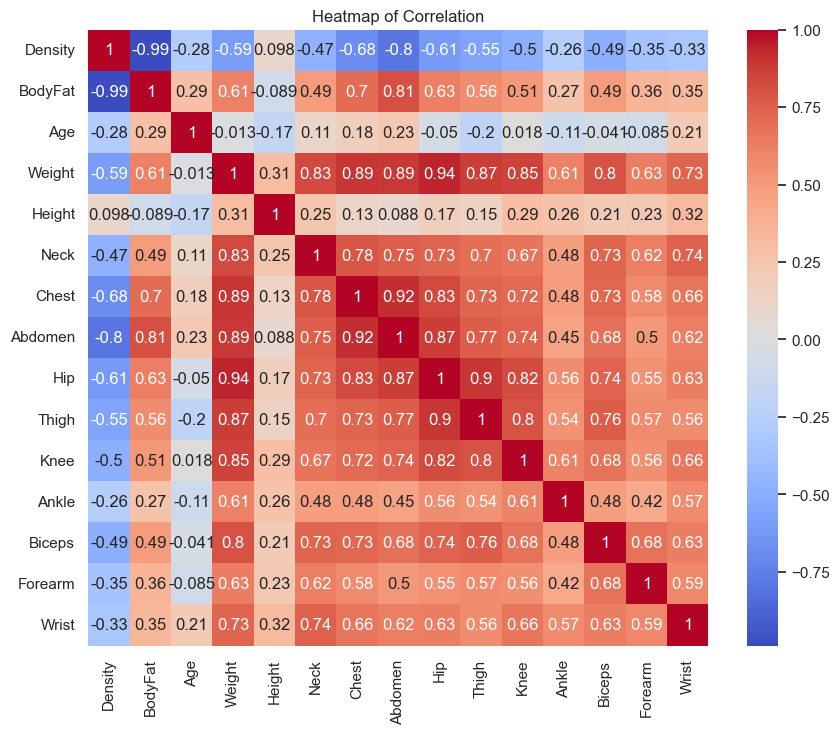

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap of Correlation")
plt.show()

### Гістограми розподілу ознак 

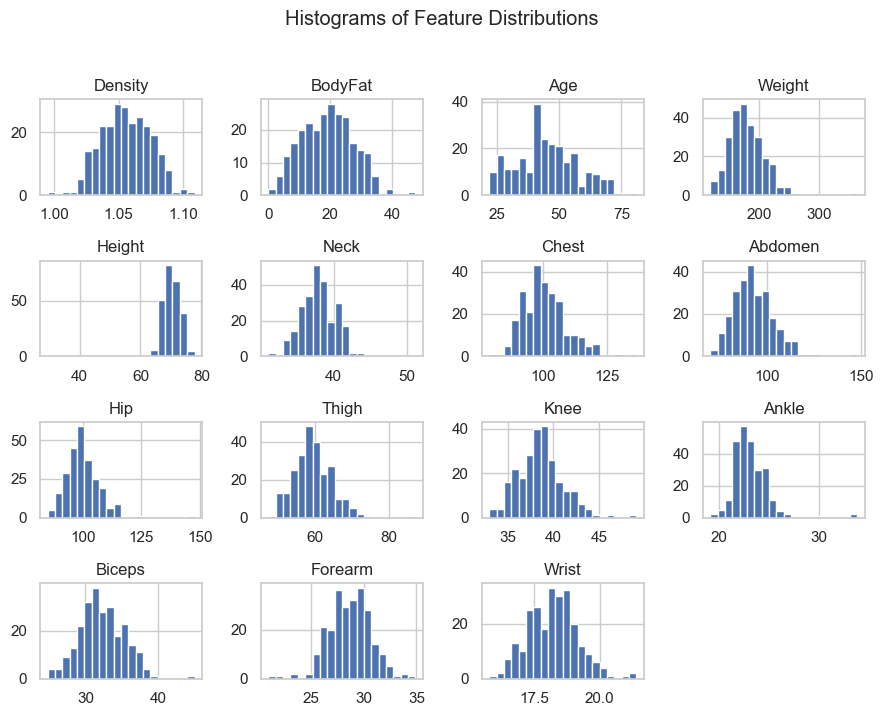

In [89]:
df.drop(columns=['BodyFatEncoded']).hist(figsize=(9, 7), bins=20)
plt.suptitle("Histograms of Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

### Boxplots

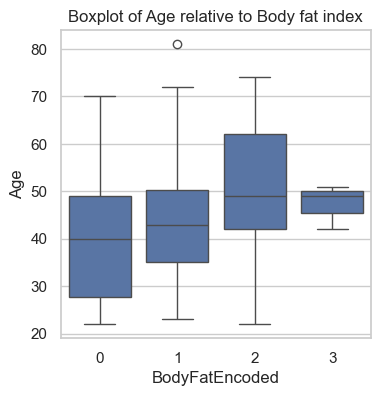

In [90]:
plt.figure(figsize=(4, 4))
sns.boxplot(x="BodyFatEncoded", y="Age", data=df_cleaned)
plt.title("Boxplot of Age relative to Body fat index")
plt.show()

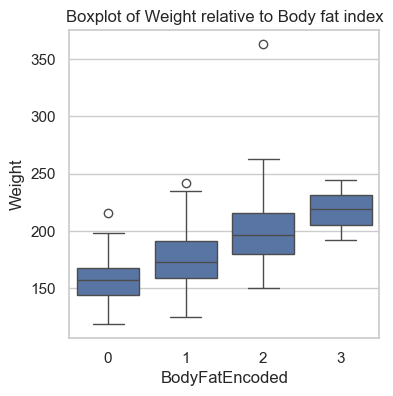

In [91]:
plt.figure(figsize=(4, 4))
sns.boxplot(x="BodyFatEncoded", y="Weight", data=df_cleaned)
plt.title("Boxplot of Weight relative to Body fat index")
plt.show()

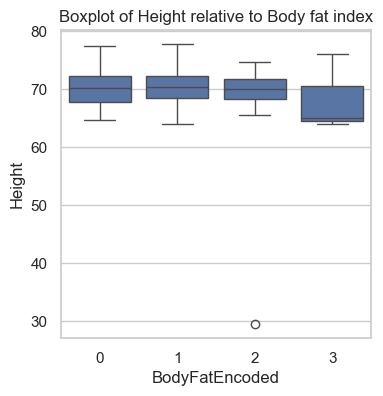

In [92]:
plt.figure(figsize=(4, 4))
sns.boxplot(x="BodyFatEncoded", y="Height", data=df_cleaned)
plt.title("Boxplot of Height relative to Body fat index")
plt.show()

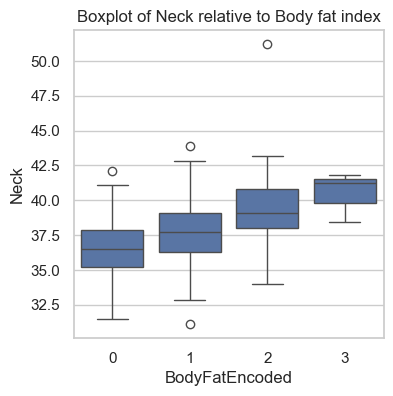

In [93]:
plt.figure(figsize=(4, 4))
sns.boxplot(x="BodyFatEncoded", y="Neck", data=df_cleaned)
plt.title("Boxplot of Neck relative to Body fat index")
plt.show()

## Нормалізувати дані

In [94]:
scaler = preprocessing.MinMaxScaler()
df_cleaned_without_code = df_cleaned.drop("BodyFatEncoded", axis=1)
columns_names = df_cleaned_without_code.columns
dt_transform = scaler.fit_transform(df_cleaned_without_code)
normalized_dataset = pd.DataFrame(dt_transform, columns=columns_names)
normalized_dataset.head()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.665496,0.258947,0.016949,0.146127,0.792746,0.253731,0.242531,0.200762,0.151515,0.294264,0.267081,0.189189,0.356436,0.460432,0.232143
1,0.792801,0.128421,0.000000,0.223789,0.886010,0.368159,0.251318,0.172808,0.218501,0.286783,0.267081,0.290541,0.282178,0.568345,0.428571
2,0.407375,0.532632,0.000000,0.145105,0.761658,0.144279,0.289982,0.235070,0.226475,0.309227,0.366460,0.331081,0.198020,0.302158,0.142857
3,0.703248,0.218947,0.067797,0.270795,0.886010,0.313433,0.395431,0.216010,0.258373,0.321696,0.267081,0.250000,0.376238,0.604317,0.428571
4,0.342406,0.604211,0.033898,0.268751,0.865285,0.164179,0.316344,0.388818,0.269537,0.399002,0.571429,0.331081,0.366337,0.482014,0.339286


## Провести навчання класифікаторів

In [95]:
#Розділяю дані на характеристики та результат який ми будемо вгадувати
#А також на тренувальні та тестові значення
characteristics = normalized_dataset
result = df_cleaned["BodyFatEncoded"]
characteristics_train, characteristics_test, result_train, result_test = train_test_split(characteristics, result, test_size=0.2, random_state=42)

### KNN

In [96]:
#Значення сусідів підібрав вручну відштовхуючись від значення точності
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(characteristics_train.values, result_train.values)
prediction = knn.predict(characteristics_test.values)

print(f'Classification report: \n{classification_report(result_test, prediction)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(result_test, prediction)}\n')
print(f'Accuracy: {accuracy_score(result_test, prediction)}')

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.94      1.00      0.97        34
           2       1.00      0.88      0.93         8

    accuracy                           0.96        51
   macro avg       0.98      0.92      0.95        51
weighted avg       0.96      0.96      0.96        51


Confusion Matrix: 
[[ 8  1  0]
 [ 0 34  0]
 [ 0  1  7]]

Accuracy: 0.9607843137254902


### Дерево ухвалення рішень

In [97]:
dtc = DecisionTreeClassifier()
dtc.fit(characteristics_train.values, result_train.values)
prediction = dtc.predict(characteristics_test.values)

print(f'Classification report: \n{classification_report(result_test, prediction)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(result_test, prediction)}\n')
print(f'Accuracy: {accuracy_score(result_test, prediction)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.97      0.99        34
           2       1.00      1.00      1.00         8

    accuracy                           0.98        51
   macro avg       0.97      0.99      0.98        51
weighted avg       0.98      0.98      0.98        51


Confusion Matrix: 
[[ 9  0  0]
 [ 1 33  0]
 [ 0  0  8]]

Accuracy: 0.9803921568627451


### SVM

In [98]:
#Пошук найкращих параметрів за допомогою gridsearch
grid_param = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid_search = GridSearchCV((SVC()), grid_param)
grid_search.fit(characteristics_train, result_train)
print(f'Best Hyperparameters:{grid_search.best_params_}')
#Вж використовую знайдені параметри
svm = SVC(C=100, gamma=0.1)
svm.fit(characteristics_train.values, result_train.values)
prediction = svm.predict(characteristics_test.values)

print(f'Classification report: \n{classification_report(result_test, prediction)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(result_test, prediction)}\n')
print(f'Accuracy: {accuracy_score(result_test, prediction)}')

c:\Users\m.shovak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters:{'C': 100, 'gamma': 0.1}
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.97      0.94      0.96        34
           2       0.88      0.88      0.88         8
           3       0.00      0.00      0.00         0

    accuracy                           0.92        51
   macro avg       0.68      0.68      0.68        51
weighted avg       0.94      0.92      0.93        51


Confusion Matrix: 
[[ 8  1  0  0]
 [ 1 32  1  0]
 [ 0  0  7  1]
 [ 0  0  0  0]]

Accuracy: 0.9215686274509803


c:\Users\m.shovak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\m.shovak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\m.shovak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

### Random Forest

In [99]:
rfc = RandomForestClassifier()
rfc.fit(characteristics_train.values, result_train.values)
prediction = rfc.predict(characteristics_test.values)

print(f'Classification report: \n{classification_report(result_test, prediction)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(result_test, prediction)}\n')
print(f'Accuracy: {accuracy_score(result_test, prediction)}')

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00         8

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51


Confusion Matrix: 
[[ 9  0  0]
 [ 0 34  0]
 [ 0  0  8]]

Accuracy: 1.0


### AdaBoost

In [100]:
ada = AdaBoostClassifier()
ada.fit(characteristics_train.values, result_train.values)
prediction = ada.predict(characteristics_test.values)

print(f'Classification report: \n{classification_report(result_test, prediction)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(result_test, prediction)}\n')
print(f'Accuracy: {accuracy_score(result_test, prediction)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.97      0.99        34
           2       1.00      1.00      1.00         8

    accuracy                           0.98        51
   macro avg       0.97      0.99      0.98        51
weighted avg       0.98      0.98      0.98        51


Confusion Matrix: 
[[ 9  0  0]
 [ 1 33  0]
 [ 0  0  8]]

Accuracy: 0.9803921568627451
